# Baseline Accuracies and Neural Networks

This notebook would explore two domains for the project. 

### Baseline Accuracies
Due to the small sample size of records, there's alot of variance in the accuracies obtained from our classifier predictions. A manual cross-validation would show the min, max and average accuracies over 10 folds.

### Neural Networks
After which, we would apply neural network models and evaluate its performance.

In [14]:
# this cell imports all required libraries

from nltk.tokenize import word_tokenize # NLTK default tokenizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statistics import mean 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Embedding, Flatten, Dense, SimpleRNN
from keras import optimizers
from keras.preprocessing import sequence

In [7]:
# In another jupyter notebook, an excel spreadsheet with the processed corpus had been saved. 
# This cell reads the spreadsheet and saves the data into lists.

testdf = pd.read_excel('processedfeaturesDF.xlsx')

class_labels=[]
class_labels=(testdf['class_labels'])

# Plain Vanilla corpus was saved under processedfeatures10
plainvanilla=[]
plainvanilla=(testdf['processed_features10'])

# Best pre-processed results was with normalization, wordlist and stopwords, i.e. processedfeatures3
processed_features3=[]
processed_features3=(testdf['processed_features3'])

In [8]:
# Just finding out statistics of the number of words in the processed dataset.
processed_features10=[]
processed_features10=(testdf['processed_features10'])

countlist=[]

for i in range(0,len(processed_features10)):
    countlist.append(len(word_tokenize(processed_features10[i])))

print('The maximum number of words is: ',max(countlist))
print('The minimum number of words is: ',min(countlist))
print('The average number of words is: ',mean(countlist))

The maximum number of words is:  6962
The minimum number of words is:  141
The average number of words is:  2510.6750483558994


### Baseline Accuracies

In [10]:
# baseline accuracy for plainvanilla corpus (i.e. no preprocessing done)
# manual cross-validation 10x:

plainvanilla_accuracy_collection=[]
for i in range(0,10):
    train_x, valid_x, train_y, valid_y = model_selection.train_test_split(plainvanilla,class_labels)

    # word level
    vectorizer=TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')

    # classifier
    classifier=svm.SVC(gamma='scale')

    train_vectors = vectorizer.fit_transform(train_x)
    test_vectors = vectorizer.transform(valid_x)

    classifier.fit(train_vectors,train_y)
    prediction=classifier.predict(test_vectors)

    plainvanilla_accuracy_collection.append(accuracy_score(valid_y,prediction))
    
print('Accuracies Collected: ', plainvanilla_accuracy_collection)
print('The minimum accuracy is: ',min(plainvanilla_accuracy_collection))
print('The maximum accuracy is: ',max(plainvanilla_accuracy_collection))
print('The average is: ',mean(plainvanilla_accuracy_collection))

Accuracies Collected:  [0.7413127413127413, 0.7142857142857143, 0.7413127413127413, 0.7258687258687259, 0.7142857142857143, 0.6795366795366795, 0.6872586872586872, 0.7065637065637066, 0.7181467181467182, 0.7181467181467182]
The minimum accuracy is:  0.6795366795366795
The maximum accuracy is:  0.7413127413127413
The average is:  0.7146718146718146


In [11]:
# baseline accuracy for processed_features3 (i.e. normalized, wordlist and stopwords removed)
# manual cross-validation 10x:

pf3_accuracy_collection=[]
for i in range(0,10):
    train_x, valid_x, train_y, valid_y = model_selection.train_test_split(processed_features3,class_labels)

    # word level
    vectorizer=TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')

    # classifier
    classifier=svm.SVC(gamma='scale')

    train_vectors = vectorizer.fit_transform(train_x)
    test_vectors = vectorizer.transform(valid_x)

    classifier.fit(train_vectors,train_y)
    prediction=classifier.predict(test_vectors)

    pf3_accuracy_collection.append(accuracy_score(valid_y,prediction))
    
print('Accuracies Collected: ', pf3_accuracy_collection)
print('The minimum accuracy is: ',min(pf3_accuracy_collection))
print('The maximum accuracy is: ',max(pf3_accuracy_collection))
print('The average is: ',mean(pf3_accuracy_collection))

Accuracies Collected:  [0.7683397683397684, 0.7760617760617761, 0.7644787644787645, 0.7876447876447876, 0.7722007722007722, 0.7876447876447876, 0.7876447876447876, 0.8262548262548263, 0.7413127413127413, 0.806949806949807]
The minimum accuracy is:  0.7413127413127413
The maximum accuracy is:  0.8262548262548263
The average is:  0.7818532818532818


# Applying Neural Networks on the Dataset

In [9]:
# 'integerize' each class label
labels_CSD_int=[]
for i in range(0,len(class_labels)):
    if class_labels[i] == 'culture':
        labels_CSD_int.append(0)
    if class_labels[i] == 'science':
        labels_CSD_int.append(1)
    if class_labels[i] == 'design':
        labels_CSD_int.append(2)

In [10]:
#finding out what is the max document size, so we know how much to pad..

from nltk.tokenize import word_tokenize # NLTK default tokenizer

len(processed_features3)
max_length = 0
for i in range(0,len(processed_features3)):
    words=word_tokenize(processed_features3[i])
    no_of_words=len(words)
    if no_of_words>max_length:
        max_length=no_of_words
max_length

3058

In [12]:
# without LSTM or RNN layers

docs = processed_features3

labels = labels_CSD_int

vocab_size = 500 # there's about 58K unique words in the corpus
encoded_docs = [one_hot(d, vocab_size) for d in docs] 

max_length = 3058 # this is the maximum number of words in all docs

padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

model=Sequential()
# set embedding output dimension size = 8, input length is the length of each document
# embedding layer provides a relation of the inputs in additional dimensions
model.add(Embedding(vocab_size,8,input_length=max_length))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

# summarize the model
print('\nModel Summary')
print(model.summary())

# fit the model using 'vectorized inputs => padded_docs'
model.fit(padded_docs, labels, epochs=50, verbose=0)

# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('\nAccuracy: %f' % (accuracy*100))


Model Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 3058, 8)           4000      
_________________________________________________________________
flatten_2 (Flatten)          (None, 24464)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 24465     
Total params: 28,465
Trainable params: 28,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\melvi\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Accuracy: 35.009670


In [15]:

max_features = 1000  # number of words to consider as features
maxlen = 3058 # max len of document

print('Loading data...')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(encoded_docs,labels_CSD_int)
print(len(train_x), 'train_sequences') # number of sequences for training in dataset
print(len(valid_x), 'test_sequences') # number of sequences for testing in dataset

print('Pad sequences')
input_train = sequence.pad_sequences(train_x, maxlen=maxlen)
input_test = sequence.pad_sequences(valid_x, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# Our vectorized labels
y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(valid_y).astype('float32')


Loading data...
775 train_sequences
259 test_sequences
Pad sequences
input_train shape: (775, 3058)
input_test shape: (259, 3058)


In [233]:
model = Sequential()
model.add(Embedding(max_features, 8))      # vocabulary=max_features, output_dim=16
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_58 (Embedding)     (None, None, 8)           8000      
_________________________________________________________________
simple_rnn_28 (SimpleRNN)    (None, 8)                 136       
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 9         
Total params: 8,145
Trainable params: 8,145
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\melvi\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 620 samples, validate on 155 samples
Epoch 1/15
620/620 [==============================] - 9s 14ms/step - loss: 0.6888 - acc: 0.3129 - val_loss: 0.6769 - val_acc: 0.3355
Epoch 2/15
620/620 [==============================] - 8s 14ms/step - loss: 0.6190 - acc: 0.3726 - val_loss: 0.6679 - val_acc: 0.3226
Epoch 3/15
620/620 [==============================] - 9s 14ms/step - loss: 0.5653 - acc: 0.3968 - val_loss: 0.6660 - val_acc: 0.3355
Epoch 4/15
620/620 [==============================] - 9s 14ms/step - loss: 0.5089 - acc: 0.4081 - val_loss: 0.6677 - val_acc: 0.3290
Epoch 5/15
620/620 [==============================] - 9s 15ms/step - loss: 0.4543 - acc: 0.4371 - val_loss: 0.6506 - val_acc: 0.3226
Epoch 6/15
620/620 [==============================] - 10s 15ms/step - loss: 0.4099 - acc: 0.4339 - val_loss: 0.6511 - val_acc: 0.3161
Epoch 7/15
620/620 [==============================] - 10s 16ms/step - loss: 0.3623 - acc: 0.4339 - val_loss: 0.6399 - val_acc: 0.3290
Epoch 8/15
620/620 [=

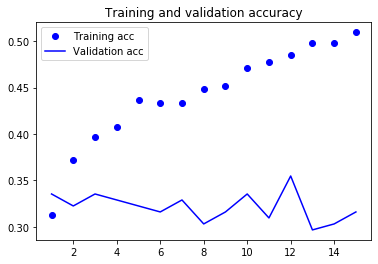

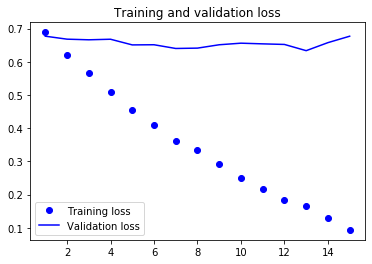

In [234]:
### Plotting results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')  # bo => blue circle line
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # b => blue line

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [251]:
# LSTM

max_features = 1000  # number of words to consider as features

from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 8))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_69 (Embedding)     (None, None, 8)           8000      
_________________________________________________________________
lstm_13 (LSTM)               (None, 8)                 544       
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 9         
Total params: 8,553
Trainable params: 8,553
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\melvi\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 620 samples, validate on 155 samples
Epoch 1/15
620/620 [==============================] - 15s 25ms/step - loss: 0.6771 - acc: 0.3323 - val_loss: 0.6601 - val_acc: 0.2774
Epoch 2/15
620/620 [==============================] - 16s 26ms/step - loss: 0.6456 - acc: 0.3419 - val_loss: 0.6314 - val_acc: 0.2774
Epoch 3/15
620/620 [==============================] - 17s 27ms/step - loss: 0.6121 - acc: 0.3419 - val_loss: 0.5969 - val_acc: 0.2774
Epoch 4/15
620/620 [==============================] - 17s 28ms/step - loss: 0.5703 - acc: 0.3419 - val_loss: 0.5522 - val_acc: 0.2774
Epoch 5/15
620/620 [==============================] - 17s 28ms/step - loss: 0.5135 - acc: 0.3419 - val_loss: 0.4884 - val_acc: 0.2774
Epoch 6/15
620/620 [==============================] - 17s 27ms/step - loss: 0.4317 - acc: 0.3419 - val_loss: 0.4017 - val_acc: 0.2774
Epoch 7/15
620/620 [==============================] - 17s 28ms/step - loss: 0.3380 - acc: 0.3419 - val_loss: 0.3260 - val_acc: 0.2774
Epoch 8/15
620/6

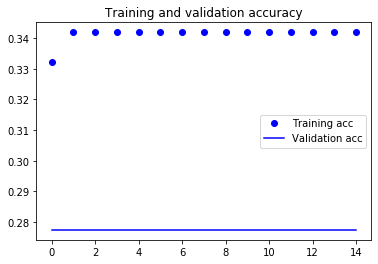

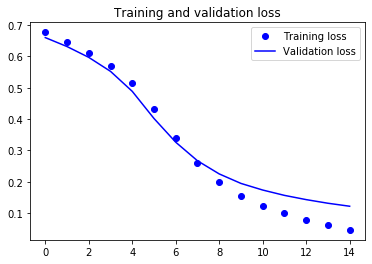

In [252]:
### Plot LSTM results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### note the better performance for LSTM